In [23]:
from hypothesis_test import NP_test
from generation import generate_from_total_pdf
from distributions import total_cdf, total_model
from hypothesis_test import NP_test
import matplotlib.pyplot as plt

true_params = {'f': 0.1, 'lam': 0.5, 'mu': 5.28, 'sigma': 0.018}

N_events = 1000
dataset = generate_from_total_pdf(N_events)

(bin_density, midpoints, h0_params, h1_params), discovery, Z, p_value = NP_test(dataset, cdf=total_cdf, starting_params=true_params, return_plot_variables=True)

Generated 1000 events in 0.001621s
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.052 (chi2/ndof = 0.0)    │              Nfcn = 85               │
│ EDM = 6.57e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬───

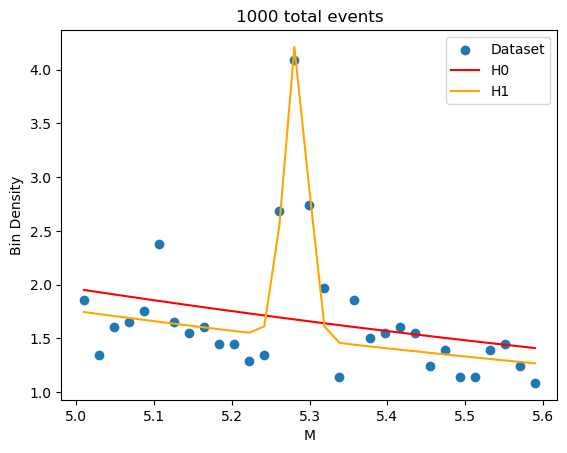

In [24]:
fig, ax = plt.subplots()

# Plotting bin count vs midpoints
ax.scatter(midpoints, bin_density, label='Dataset', marker='o')
# ax.plot(midpoints, total_model(midpoints, **true_params), label='True model', color='red')
ax.plot(midpoints, total_model(midpoints, *h0_params), label='H0', color='red')
ax.plot(midpoints, total_model(midpoints, *h1_params), label='H1', color='orange')

ax.set_xlabel('M')
ax.set_ylabel('Bin Density')
ax.set_title(f'{N_events} total events')

ax.legend()

In [25]:
print(discovery, Z, p_value)

False 2.6104385992367565 0.0045213101625717345
